In [25]:
%pip install numpy pandas matplotlib
import numpy as np
import pandas as pd
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 26.0 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [26]:
# Loading Data Set
data=pd.read_csv("./assets/Student_Performance.csv").head(10000).tail(1000)
X=data.iloc[:,2]
Y=data.iloc[:,-5]
print(X.head())
print(Y.head())


9000    77.10
9001    74.51
9002    89.67
9003    82.83
9004    90.76
Name: Atten_Percent, dtype: float64
9000    67.19
9001    65.12
9002    50.90
9003    44.96
9004    59.97
Name: Final_Sc, dtype: float64


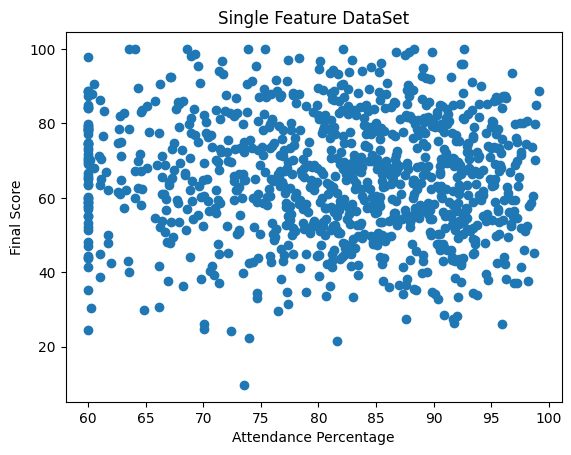

In [27]:
# Dataset plot scattered
# printing complete dataset
fig, plot_data_set = plt.subplots()
plot_data_set.set_title("Single Feature DataSet")
plot_data_set.set_xlabel("Attendance Percentage")
plot_data_set.set_ylabel("Final Score")
plot_data_set.scatter(X,Y,label="Data Points")

fig.savefig("./assets/student_single_feature_atd_vs_fscore.png", bbox_inches='tight')

plt.show()

In [28]:
# loading training data
training_data_size=len(X)
# features and lables
features=pd.DataFrame({
    "intercept Coeffecient":np.ones(training_data_size),
    "feature 1":X
})
labels=Y


# print features and labels
print("Total Features",len(features))
print(features)
print("label")
print("Label : ",type(labels),"length-",len(labels))
print(labels.head())



Total Features 1000
      intercept Coeffecient  feature 1
9000                    1.0      77.10
9001                    1.0      74.51
9002                    1.0      89.67
9003                    1.0      82.83
9004                    1.0      90.76
...                     ...        ...
9995                    1.0      81.29
9996                    1.0      88.54
9997                    1.0      86.69
9998                    1.0      92.29
9999                    1.0      72.63

[1000 rows x 2 columns]
label
Label :  <class 'pandas.Series'> length- 1000
9000    67.19
9001    65.12
9002    50.90
9003    44.96
9004    59.97
Name: Final_Sc, dtype: float64


In [ ]:
# Model Training From Scratch - Gradient Descent
features_len=len(features.columns)
coefficient_vector=np.zeros(features_len)
coefficient_history=[]

learning_rate=0.00001

def hypothesis(
        coefficient_vector=None,
        feature_vector=None
        ):
    # print(coefficient_vector)
    # print(feature_vector)
    return np.dot(coefficient_vector,feature_vector)
    
# for i in range(training_data_size):
f_v=features.iloc[0].to_numpy()
l_v=labels.iloc[0]
# print(f_v)
# print(l_v)
# print(-1*learning_rate*(hypothesis(coefficient_vector,f_v)-l_v)*f_v[1])

# training
for i in range(training_data_size):
    # itteratin through features
    feature_v=features.iloc[i].to_numpy()
    label_v=labels.iloc[i]
    hypothesis_v=hypothesis(coefficient_vector,feature_v) # hpothesis
    # print(coefficient_vector)
    # t_vector=np.zeros(len(coefficient_vector))
    for fi in range(features_len):
        cost=((hypothesis_v-l_v)*f_v[fi])*learning_rate
        # update ith coefficient
        # print("---------")
        # print()
        # print(coefficient_vector[fi]+(((hypothesis_v-l_v)*f_v[fi])*learning_rate*-1))
        coefficient_vector[fi]=coefficient_vector[fi]-(cost)
        # print(coefficient_vector[fi]-learning_rate*(((hypothesis_v)-l_v)*f_v[fi]))
    coefficient_history.append(coefficient_vector.copy())

print(coefficient_history)


[array([0.0006719 , 0.05180349]), array([0.00130519, 0.1006305 ]), array([0.00188685, 0.14547583]), array([0.00243823, 0.1879875 ]), array([0.00293949, 0.22663451]), array([0.00339964, 0.26211197]), array([0.00386706, 0.29814995]), array([0.00427738, 0.32978594]), array([0.00469672, 0.36211707]), array([0.00501352, 0.38654213]), array([0.00535035, 0.41251202]), array([0.00577469, 0.44522858]), array([0.00617939, 0.47643134]), array([0.00647142, 0.49894663]), array([0.00680747, 0.52485564]), array([0.00712597, 0.54941192]), array([0.00732151, 0.56448833]), array([0.00765464, 0.59017295]), array([0.00780222, 0.60155081]), array([0.00797878, 0.61516399]), array([0.0082815 , 0.63850384]), array([0.00852686, 0.65742113]), array([0.00860812, 0.66368576]), array([0.00874487, 0.67422922]), array([0.00894654, 0.68977817]), array([0.00905818, 0.69838575]), array([0.00920117, 0.70941041]), array([0.00918968, 0.70852406]), array([0.00920213, 0.70948439]), array([0.00938553, 0.72362444]), array([0.

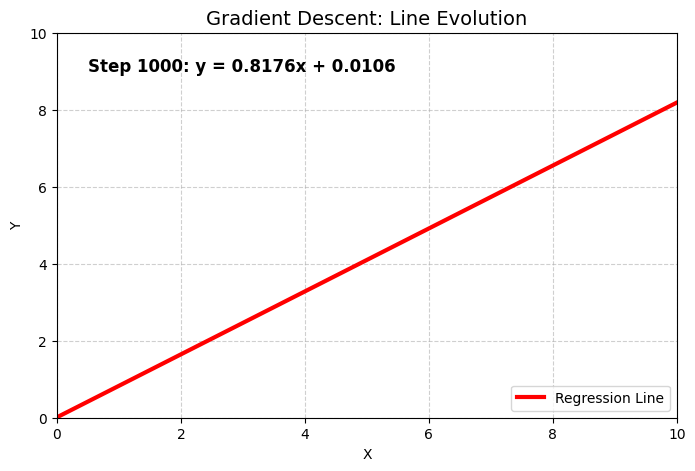

In [30]:
# 2. Setup Plot
fig, ax = plt.subplots(figsize=(8, 5))
x_vals = np.linspace(0, 10, 100) # Range of your X data
line, = ax.plot([], [], color='red', lw=3, label='Regression Line')
text = ax.text(0.05, 0.9, '', transform=ax.transAxes, fontsize=12, fontweight='bold')

# Axis Setup
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_title('Gradient Descent: Line Evolution', fontsize=14)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend(loc='lower right')
ax.grid(True, linestyle='--', alpha=0.6)

# 3. Animation Functions
def init():
    line.set_data([], [])
    text.set_text('')
    return line, text

def update(frame):
    intercept, slope = coefficient_history[frame]
    y_vals = intercept + (slope * x_vals)
    line.set_data(x_vals, y_vals)
    text.set_text(f'Step {frame+1}: y = {slope:.4f}x + {intercept:.4f}')
    return line, text

# 4. Create and Save
ani = FuncAnimation(fig, update, frames=len(coefficient_history), 
                    init_func=init, blit=True, interval=200)

# Save as GIF (requires 'pillow' library: pip install pillow)
ani.save('./assets/regression_evolution_simple.gif', writer='pillow')
plt.show()